<a href="https://colab.research.google.com/github/eviidoe/project2/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**

## **Data Exploration**

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv('/content/test (1).csv')

FileNotFoundError: ignored

In [ ]:
# Import Titanic Training data
df = pd.read_csv('https://raw.githubusercontent.com/Daredeveil/CAB-21/main/titanic/train.csv')
df = df.drop(columns=['Name', 'Cabin', 'Ticket'])
df.loc[df['Embarked'].isnull(),'Embarked'] = 'S'
df.Age = df.Age.fillna(df.Age.mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Titanic Training data top 5 values (by default)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df = pd.get_dummies(df)

In [ ]:
# No. of records (rows) and columns
df.shape

(891, 12)

In [ ]:
# Data type for columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Age = df.Age.fillna(df.Age.mean())

In [ ]:
# Columns headings
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Survived = df.Survived.astype('category')
df.Pclass = df.Pclass.astype('category')
df.PassengerId = df.PassengerId.astype('category')

In [ ]:
# In order to extract catagories
print(df[['Survived', 'Sex']].groupby(['Survived'])['Sex'].value_counts())
print(df[['Survived', 'Pclass']].groupby(['Survived'])['Pclass'].value_counts())
print(df[['Survived', 'Embarked']].groupby(['Survived'])['Embarked'].value_counts())
print(df[['Survived', 'Parch']].groupby(['Survived'])['Parch'].value_counts())

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64
Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64
Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64
Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64


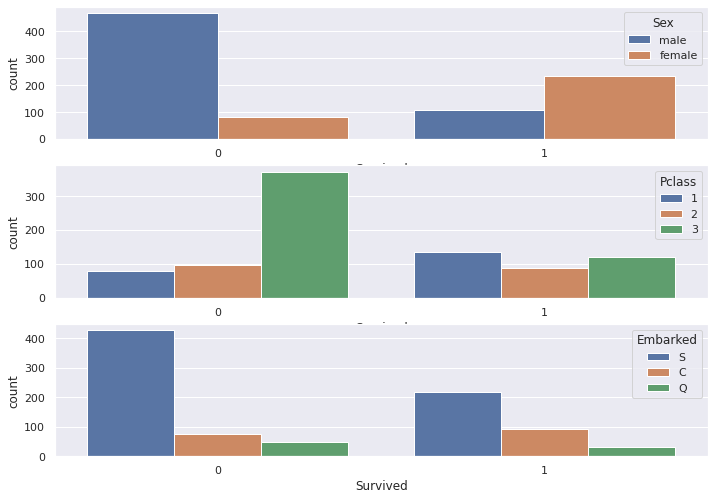

In [ ]:
# Count plot for survivales based on Sex, Pessenger class 'Pclass' and Port of Embarkation 'Embarked'

#plt.figure(figsize=(30,30))
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(3,1)
sns.countplot(x='Survived', data=df, hue='Sex', dodge=True, ax=ax[0])
sns.countplot(x='Survived', data=df, hue='Pclass', dodge=True, ax=ax[1])
sns.countplot(x='Survived', data=df, hue='Embarked', dodge=True, ax=ax[2])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

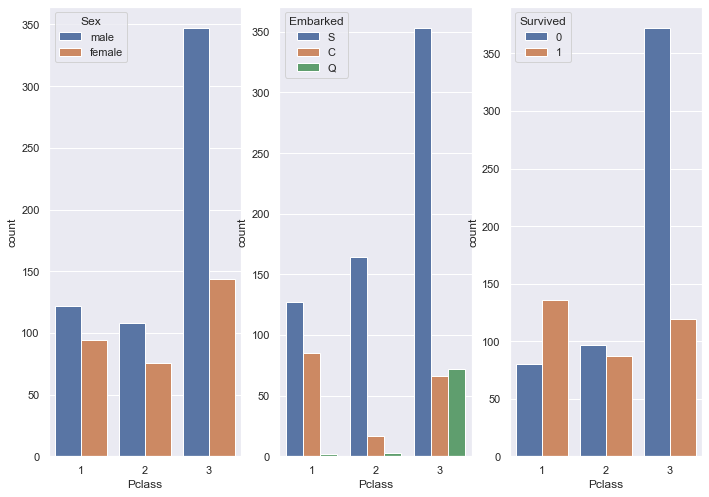

In [ ]:
# Count plot for Pessenger class 'Pclass' based on Sex, Embarked and survival
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(1,3)
sns.countplot(x=df['Pclass'], hue=df['Sex'], dodge=True, ax=ax[0])
sns.countplot(x=df['Pclass'], hue=df['Embarked'], dodge=True, ax=ax[1])
sns.countplot(x=df['Pclass'], hue=df['Survived'], dodge=True, ax=ax[2])

<AxesSubplot:xlabel='Survived', ylabel='count'>

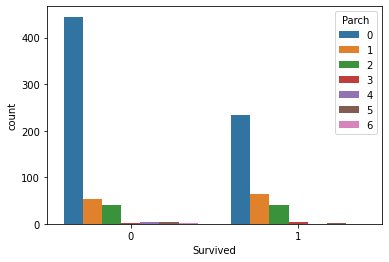

In [ ]:
# Trying to see the Dataframe distribution based on Parent child 'Parch' column
sns.countplot(x='Survived', data=df, hue='Parch', dodge=True)

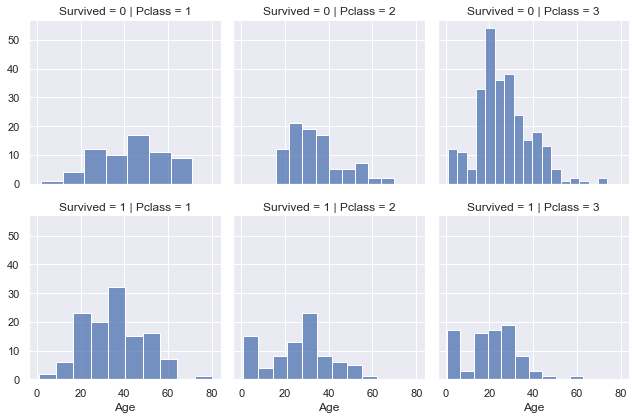

In [ ]:
# Plotting Pessenger class 'Pclass' count w.r.t Age distribution
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.histplot, 'Age')
plt.show()

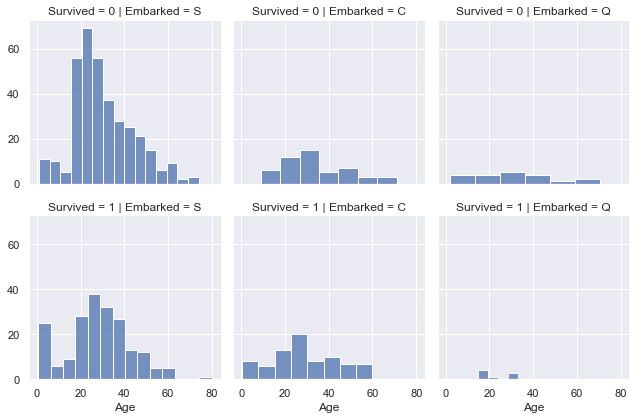

In [ ]:
# Plotting Port of Embarkation 'Embarked' count w.r.t Age distribution (S=Southampton, C=Cherbourg, Q=Queenstown)
g = sns.FacetGrid(df, row='Survived', col='Embarked')
g.map(sns.histplot, 'Age')
plt.show()

In [ ]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=df)

In [ ]:
first_class = (df['Pclass'] == 1).sum()
second_class = (df['Pclass'] == 2).sum()
third_class = (df['Pclass'] == 3).sum()
print(first_class)
print(second_class)
print(third_class)

216
184
491


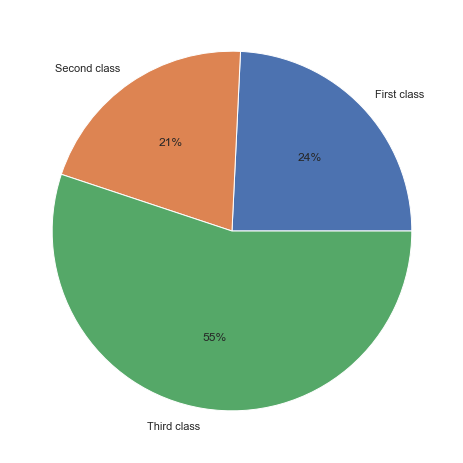

In [ ]:
labels = ['First class', 'Second class', 'Third class']

sizes = [first_class, second_class, third_class]
plt.pie(x=sizes, labels=labels, autopct='%2.0f%%');

## **Feature Importance**

In [ ]:
df

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.loc[df['Embarked'].isnull(),'Embarked'] = 'S'

In [ ]:
 df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#df.loc[df['Sex'] == 'male', 'Male'] = True
#df.loc[df['Sex'] == 'female', 'Male'] = False

In [ ]:
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
df = df[['Pclass', 'Survived', 'Fare']]
df.Pclass = df.Pclass.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [ ]:
df.corr()

,Survived,Fare
Survived,1.000000,0.257307
Fare,0.257307,1.000000


In [ ]:
#sns.scatterplot(x = 'Age', y = 'Fare', data = df)

In [ ]:
X = df.drop(columns = ['Survived'])
y = df.Survived

In [ ]:
df.dtypes

Pclass      category
Survived       int64
Fare         float64
dtype: object

In [ ]:
X

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree



clf = DecisionTreeClassifier(max_depth= 3)
dtree = clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

print("feat importance = " + str(feat_importance))

feat importance = [0.         0.03497546 0.01283013 0.         0.         0.
 0.13964796 0.         0.         0.         0.        ]


In [ ]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

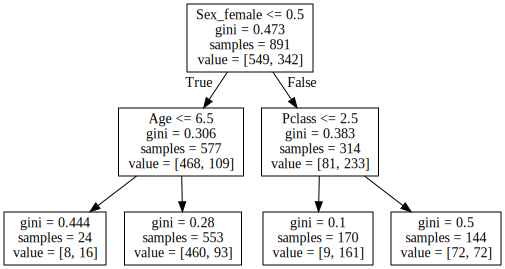

In [ ]:
tree.export_graphviz(dtree, feature_names = X.columns)
from graphviz import Source
Source(tree.export_graphviz(dtree, feature_names = X.columns))




## **Modelling**

### **DT**

In [ ]:
#df = df[['Pclass', 'Survived', 'Fare', 'Age']]
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [ ]:
df

,Pclass,Survived,Fare,Age
0,3,0,7.2500,22.000000
1,1,1,71.2833,38.000000
2,3,1,7.9250,26.000000
3,1,1,53.1000,35.000000
4,3,0,8.0500,35.000000
...,...,...,...,...
886,2,0,13.0000,27.000000
887,1,1,30.0000,19.000000
888,3,0,23.4500,29.699118
889,1,1,30.0000,26.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred =  dtree.predict(X_test)

In [ ]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.7094972067039106

### **RF**

In [ ]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred =  rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [ ]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,710,3,29.699118,1,1,15.2458,0,1,1,0,0
439,440,2,31.000000,0,0,10.5000,0,1,0,0,1
840,841,3,20.000000,0,0,7.9250,0,1,0,0,1
720,721,2,6.000000,0,1,33.0000,1,0,0,0,1
39,40,3,14.000000,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
433,434,3,17.000000,0,0,7.1250,0,1,0,0,1
773,774,3,29.699118,0,0,7.2250,0,1,1,0,0
25,26,3,38.000000,1,5,31.3875,1,0,0,0,1
84,85,2,17.000000,0,0,10.5000,1,0,0,0,1


In [ ]:
y_pred



array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
test = test.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [ ]:
#test = pd.get_dummies(test)
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
rf.predict(test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,